In [266]:
import pandas as pd


## Passes

In [267]:
df_passe = pd.read_excel("passes_br.xlsx")

In [268]:
df_passe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Rk                   768 non-null    object
 1   Player               768 non-null    object
 2   Nation               768 non-null    object
 3   Pos                  768 non-null    object
 4   Squad                768 non-null    object
 5   Age                  768 non-null    object
 6   Born                 768 non-null    object
 7   90s                  768 non-null    object
 8   Cmp                  768 non-null    object
 9   Att                  768 non-null    object
 10  Cmp%                 766 non-null    object
 11  TotDist              768 non-null    object
 12  PrgDist              768 non-null    object
 13  Cmp.1                768 non-null    object
 14  Att.1                768 non-null    object
 15  Cmp%.1               759 non-null    object
 16  Cmp.2   

In [269]:
df_passe = df_passe.drop(['Rk', 'Nation', 'Born','Cmp.1','Att.1','Cmp%.1','Cmp.2','Att.2','Cmp%.2','Matches'], axis=1)

In [270]:
df_passe['90s'] = pd.to_numeric(df_passe['90s'], errors='coerce')
df_passe['PrgP'] = pd.to_numeric(df_passe['PrgP'], errors='coerce')
df_passe['Cmp'] = pd.to_numeric(df_passe['Cmp'], errors='coerce')
df_passe['KP'] = pd.to_numeric(df_passe['KP'], errors='coerce')

In [271]:
# Apenas jogadores com 900+ Minutos
df_filtrado = df_passe[(df_passe['90s'] >= 10)].copy()


In [272]:
df_filtrado['PrgP/90s'] = df_filtrado['PrgP']/df_filtrado['90s']
# Pegar top 10 jogadores com melhor valor na estatística e 900+ minutos
df_prgp_90s = df_filtrado.nlargest(10, 'PrgP/90s')
df_prgp_90s

,Player,Pos,Squad,Age,90s,Cmp,Att,Cmp%,TotDist,PrgDist,...,Ast,xAG,xA,A-xAG,KP,2025-03-01 00:00:00,PPA,CrsPA,PrgP,PrgP/90s
346,Jorginho,MF,Flamengo,33-334,12.6,1030.0,1139,90.4,16521,5052,...,0,0.4,1.4,-0.4,11.0,130,23,2,123.0,9.761905
499,Neymar,"FW,MF",Santos,33-287,13.1,493.0,654,75.4,7919,3005,...,0,2.3,2.7,-2.3,38.0,80,30,2,112.0,8.549618
159,Danilo,DF,Flamengo,34-127,12.2,934.0,1009,92.6,18090,6817,...,0,0.4,0.5,-0.4,2.0,114,6,0,103.0,8.442623
164,Nicolás De La Cruz,MF,Flamengo,28-171,11.1,772.0,883,87.4,12732,3655,...,0,1.1,1.6,-1.1,17.0,95,17,2,92.0,8.288288
676,Matheus Pereira da Silva,MF,Fortaleza,27-267,12.4,594.0,747,79.5,10813,3508,...,3,1.6,1.6,+1.4,14.0,104,10,2,102.0,8.225806
589,Everton Ribeiro,MF,Bahia,36-223,18.1,858.0,1027,83.5,14390,4616,...,3,4.4,5.4,-1.4,44.0,109,33,5,144.0,7.955801
250,Rodrigo Garro,MF,Corinthians,27-319,14.1,619.0,854,72.5,11075,3738,...,3,4.4,4.4,-1.4,44.0,79,37,2,112.0,7.943262
381,Lucas Lima,"MF,FW",Sport Recife,35-133,24.5,912.0,1209,75.4,17845,6421,...,7,4.5,6.7,+2.5,79.0,118,63,15,187.0,7.632653
230,Marlon Freitas,MF,Botafogo (RJ),30-237,28.5,1740.0,1940,89.7,34674,8932,...,4,3.0,3.5,+1.0,32.0,211,33,3,210.0,7.368421
659,Gustavo Scarpa,"MF,FW",Atlético Mineiro,31-318,24.0,1037.0,1380,75.1,22219,6558,...,3,4.3,5.4,-1.3,60.0,140,46,10,174.0,7.250000


In [273]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


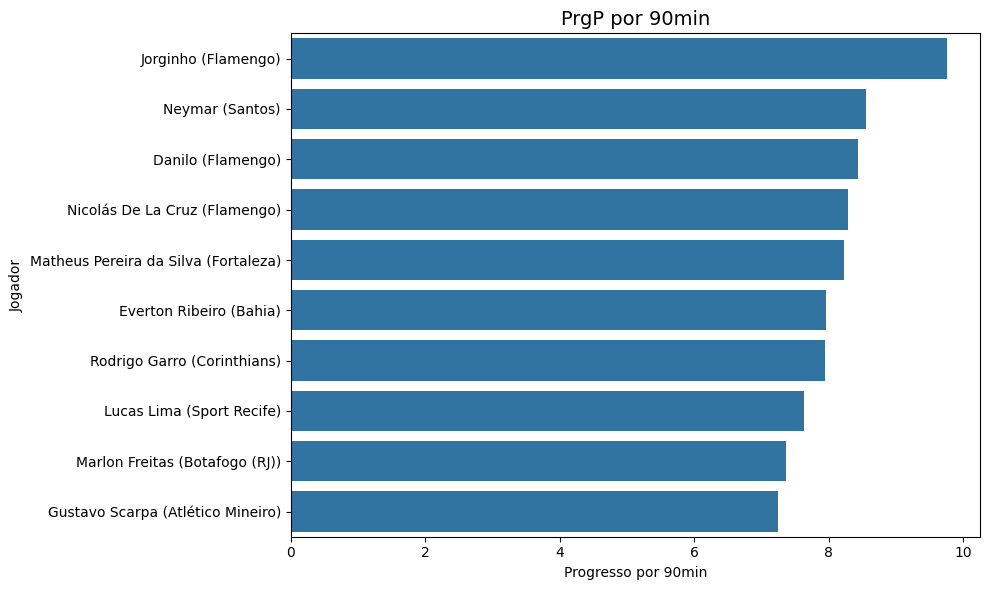

In [274]:
df_prgp_90s['Player'] = np.where(
    df_prgp_90s['Player'].str.contains(r"\("),   # já tem parênteses?
    df_prgp_90s['Player'],                       # então mantém
    df_prgp_90s['Player'] + ' (' + df_prgp_90s['Squad'] + ')'
)

plt.figure(figsize=(10,6))

# Gráfico de barras horizontal
sns.barplot(
    x='PrgP/90s', 
    y='Player', 
    data=df_prgp_90s, 
)

plt.title('PrgP por 90min', fontsize=14)
plt.xlabel('Progresso por 90min')
plt.ylabel('Jogador')

plt.tight_layout()
plt.show()


In [275]:
df_passe.head(20)

,Player,Pos,Squad,Age,90s,Cmp,Att,Cmp%,TotDist,PrgDist,...,Cmp%.3,Ast,xAG,xA,A-xAG,KP,2025-03-01 00:00:00,PPA,CrsPA,PrgP
0,Abner,DF,Juventude,21-214,14.2,464.0,546,85.0,9528,3231,...,56.2,1,0.4,0.2,+0.6,5.0,23,1,0,21.0
1,Nicolás Acevedo,MF,Bahia,26-219,15.1,860.0,1014,84.8,14076,3785,...,63.1,1,1.4,1.4,-0.4,15.0,91,10,1,87.0
2,Luciano Acosta,MF,Fluminense,31-172,10.2,339.0,454,74.7,5198,1670,...,48.1,1,1.6,2.0,-0.6,23.0,52,31,5,69.0
3,Adriel,MF,Sport Recife,19-130,0.5,12.0,13,92.3,170,35,...,NaN,0,0.0,0.0,0.0,0.0,0,0,0,1.0
4,Adson,"FW,MF",Vasco da Gama,25-044,2.3,122.0,146,83.6,1503,290,...,66.7,0,0.2,0.3,-0.2,4.0,13,4,1,12.0
5,Braian Aguirre,DF,Internacional,25-114,23.4,1004.0,1300,77.2,17751,6466,...,58.0,0,1.0,1.0,-1.0,12.0,82,19,8,107.0
6,Carlos Alberto,"FW,MF",Sport Recife,23-219,3.7,51.0,69,73.9,761,255,...,50.0,0,0.1,0.0,-0.1,2.0,2,0,0,9.0
7,Yuri Alberto,FW,Corinthians,24-246,19.3,207.0,285,72.6,2908,474,...,69.2,2,1.5,0.4,+0.5,13.0,17,5,1,20.0
8,José Aldo,MF,Mirassol,27-117,12.7,551.0,658,83.7,9214,2978,...,72.4,1,2.0,1.6,-1.0,16.0,53,8,2,84.0
9,Alesson,FW,Mirassol,26-276,13.0,252.0,335,75.2,3622,1046,...,42.9,5,2.0,2.0,+3.0,20.0,14,24,12,30.0


In [276]:
df_filtrado['Cmp/90s'] = df_filtrado['Cmp']/df_filtrado['90s']
df_filtrado.head(20)

,Player,Pos,Squad,Age,90s,Cmp,Att,Cmp%,TotDist,PrgDist,...,xAG,xA,A-xAG,KP,2025-03-01 00:00:00,PPA,CrsPA,PrgP,PrgP/90s,Cmp/90s
0,Abner,DF,Juventude,21-214,14.2,464.0,546,85.0,9528,3231,...,0.4,0.2,+0.6,5.0,23,1,0,21.0,1.478873,32.676056
1,Nicolás Acevedo,MF,Bahia,26-219,15.1,860.0,1014,84.8,14076,3785,...,1.4,1.4,-0.4,15.0,91,10,1,87.0,5.761589,56.953642
2,Luciano Acosta,MF,Fluminense,31-172,10.2,339.0,454,74.7,5198,1670,...,1.6,2.0,-0.6,23.0,52,31,5,69.0,6.764706,33.235294
5,Braian Aguirre,DF,Internacional,25-114,23.4,1004.0,1300,77.2,17751,6466,...,1.0,1.0,-1.0,12.0,82,19,8,107.0,4.572650,42.905983
7,Yuri Alberto,FW,Corinthians,24-246,19.3,207.0,285,72.6,2908,474,...,1.5,0.4,+0.5,13.0,17,5,1,20.0,1.036269,10.725389
8,José Aldo,MF,Mirassol,27-117,12.7,551.0,658,83.7,9214,2978,...,2.0,1.6,-1.0,16.0,53,8,2,84.0,6.614173,43.385827
9,Alesson,FW,Mirassol,26-276,13.0,252.0,335,75.2,3622,1046,...,2.0,2.0,+3.0,20.0,14,24,12,30.0,2.307692,19.384615
10,Caio Alexandre,MF,Bahia,26-268,13.1,849.0,950,89.4,15107,3773,...,1.2,1.2,-0.2,9.0,89,13,4,91.0,6.946565,64.809160
11,Matheus Alexandre,DF,Sport Recife,26-226,16.8,572.0,707,80.9,8754,3335,...,0.8,0.9,+0.2,8.0,30,13,9,52.0,3.095238,34.047619
13,Alisson,MF,São Paulo,32-147,19.9,1082.0,1237,87.5,19379,4821,...,0.6,0.9,+0.4,17.0,104,13,5,117.0,5.879397,54.371859


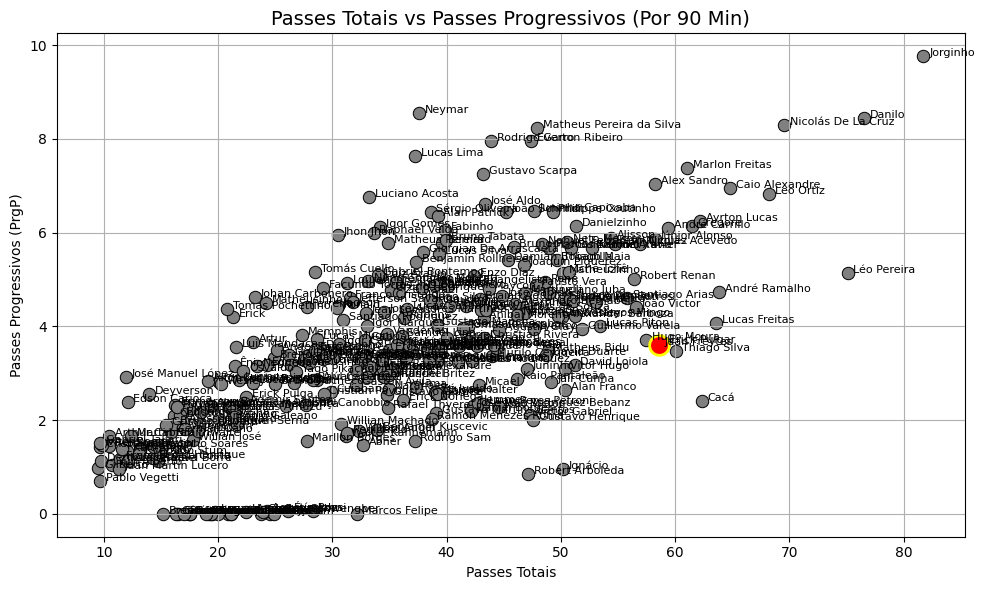

In [277]:
jogador_destaque = "Juan Freytes"

plt.figure(figsize=(10,6))

# Plot dos demais jogadores
sns.scatterplot(
    x='Cmp/90s',
    y='PrgP/90s',
    data=df_filtrado[df_filtrado['Player'] != jogador_destaque],
    color='gray',  
    s=80,
    edgecolor='black'
)

# Plot do jogador destacado
sns.scatterplot(
    x='Cmp/90s',
    y='PrgP/90s',
    data=df_filtrado[df_filtrado['Player'] == jogador_destaque],
    color='red',  
    s=200,
    edgecolor='yellow',
    linewidth=2
)

for i in range(len(df_filtrado)):
    plt.text(df_filtrado['Cmp/90s'].iloc[i]+0.5, df_filtrado['PrgP/90s'].iloc[i], df_filtrado['Player'].iloc[i], fontsize=8)

plt.title('Passes Totais vs Passes Progressivos (Por 90 Min)', fontsize=14)
plt.xlabel('Passes Totais')
plt.ylabel('Passes Progressivos (PrgP)')

plt.grid(True)
plt.tight_layout()
plt.show()


In [278]:
df_filtrado['P/90s'] = df_filtrado['Cmp']/df_filtrado['90s']
df_filtrado.head()

,Player,Pos,Squad,Age,90s,Cmp,Att,Cmp%,TotDist,PrgDist,...,xA,A-xAG,KP,2025-03-01 00:00:00,PPA,CrsPA,PrgP,PrgP/90s,Cmp/90s,P/90s
0,Abner,DF,Juventude,21-214,14.2,464.0,546,85.0,9528,3231,...,0.2,+0.6,5.0,23,1,0,21.0,1.478873,32.676056,32.676056
1,Nicolás Acevedo,MF,Bahia,26-219,15.1,860.0,1014,84.8,14076,3785,...,1.4,-0.4,15.0,91,10,1,87.0,5.761589,56.953642,56.953642
2,Luciano Acosta,MF,Fluminense,31-172,10.2,339.0,454,74.7,5198,1670,...,2.0,-0.6,23.0,52,31,5,69.0,6.764706,33.235294,33.235294
5,Braian Aguirre,DF,Internacional,25-114,23.4,1004.0,1300,77.2,17751,6466,...,1.0,-1.0,12.0,82,19,8,107.0,4.572650,42.905983,42.905983
7,Yuri Alberto,FW,Corinthians,24-246,19.3,207.0,285,72.6,2908,474,...,0.4,+0.5,13.0,17,5,1,20.0,1.036269,10.725389,10.725389


In [279]:
df_filtrado['KP/90s'] = df_filtrado['KP']/df_filtrado['90s']
df_kp_90s = df_filtrado.nlargest(10, 'KP/90s')
df_kp_90s

,Player,Pos,Squad,Age,90s,Cmp,Att,Cmp%,TotDist,PrgDist,...,A-xAG,KP,2025-03-01 00:00:00,PPA,CrsPA,PrgP,PrgP/90s,Cmp/90s,P/90s,KP/90s
526,Alan Patrick,"MF,FW",Internacional,34-190,23.3,914.0,1131,80.8,14835,4692,...,-4.0,85.0,122,43,1,148.0,6.351931,39.227468,39.227468,3.648069
381,Lucas Lima,"MF,FW",Sport Recife,35-133,24.5,912.0,1209,75.4,17845,6421,...,+2.5,79.0,118,63,15,187.0,7.632653,37.224490,37.224490,3.224490
250,Rodrigo Garro,MF,Corinthians,27-319,14.1,619.0,854,72.5,11075,3738,...,-1.4,44.0,79,37,2,112.0,7.943262,43.900709,43.900709,3.120567
341,Jhon Jhon,"MF,FW",RB Bragantino,23-071,27.7,844.0,1136,74.3,16198,5383,...,-1.3,85.0,118,51,7,165.0,5.956679,30.469314,30.469314,3.068592
79,Bernard,"MF,FW",Atlético Mineiro,33-072,10.2,404.0,519,77.8,6485,1598,...,-0.8,31.0,33,20,7,59.0,5.784314,39.607843,39.607843,3.039216
499,Neymar,"FW,MF",Santos,33-287,13.1,493.0,654,75.4,7919,3005,...,-2.3,38.0,80,30,2,112.0,8.549618,37.633588,37.633588,2.900763
40,Jhon Arias,FW,Fluminense,28-059,12.0,610.0,732,83.3,8431,2112,...,+1.1,33.0,37,24,10,55.0,4.583333,50.833333,50.833333,2.750000
543,Matheus Pereira,"MF,FW",Cruzeiro,29-198,28.0,977.0,1337,73.1,14622,5120,...,0.0,75.0,134,53,16,162.0,5.785714,34.892857,34.892857,2.678571
150,Franco Cristaldo,"MF,FW",Grêmio,29-096,11.1,350.0,460,76.1,6065,1877,...,+0.1,28.0,51,11,2,51.0,4.594595,31.531532,31.531532,2.522523
659,Gustavo Scarpa,"MF,FW",Atlético Mineiro,31-318,24.0,1037.0,1380,75.1,22219,6558,...,-1.3,60.0,140,46,10,174.0,7.250000,43.208333,43.208333,2.500000


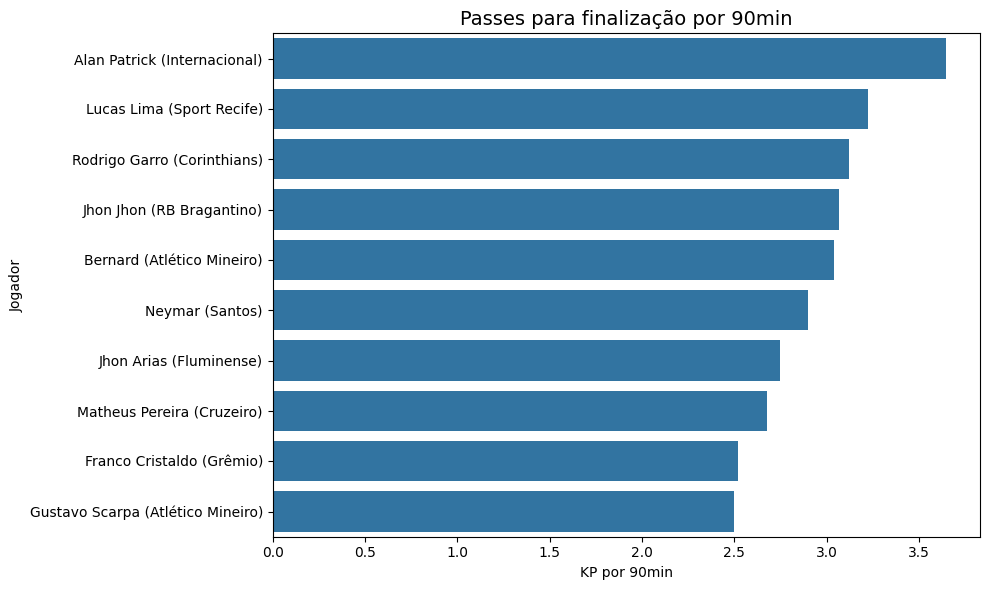

In [280]:
df_kp_90s['Player'] = np.where(
    df_kp_90s['Player'].str.contains(r"\("),
    df_kp_90s['Player'],
    df_kp_90s['Player'] + ' (' + df_kp_90s['Squad'] + ')'
)

plt.figure(figsize=(10,6))

sns.barplot(
    x='KP/90s', 
    y='Player', 
    data=df_kp_90s, 
)

plt.title('Passes para finalização por 90min', fontsize=14)
plt.xlabel('KP por 90min')
plt.ylabel('Jogador')

plt.tight_layout()
plt.show()

## Chutes

In [281]:
df_chutes = pd.read_excel('chutes_br.xlsx')
df_chutes.head(10)

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Abner,br BRA,DF,Juventude,21-214,2004,14.2,0,2,...,8.0,0,0,0,0.2,0.2,0.09,-0.2,-0.2,Matches
1,2,Nicolás Acevedo,uy URU,MF,Bahia,26-219,1999,15.1,0,12,...,27.7,0,0,0,0.3,0.3,0.03,-0.3,-0.3,Matches
2,3,Luciano Acosta,ar ARG,MF,Fluminense,31-172,1994,10.2,2,17,...,17.5,1,0,0,2.6,2.6,0.15,-0.6,-0.6,Matches
3,4,Adriel,br BRA,MF,Sport Recife,19-130,2006,0.5,0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches
4,5,Adson,br BRA,"FW,MF",Vasco da Gama,25-044,2000,2.3,0,3,...,20.2,0,0,0,0.1,0.1,0.04,-0.1,-0.1,Matches
5,6,Braian Aguirre,ar ARG,DF,Internacional,25-114,2000,23.4,1,16,...,28.0,0,0,0,0.5,0.5,0.03,+0.5,+0.5,Matches
6,7,Carlos Alberto,br BRA,"FW,MF",Sport Recife,23-219,2002,3.7,0,3,...,17.9,0,0,0,0.5,0.5,0.17,-0.5,-0.5,Matches
7,8,Yuri Alberto,br BRA,FW,Corinthians,24-246,2001,19.3,8,56,...,15.3,0,1,2,9.4,8.1,0.14,-1.4,-1.1,Matches
8,9,José Aldo,br BRA,MF,Mirassol,27-117,1998,12.7,0,18,...,21.4,0,0,0,0.9,0.9,0.05,-0.9,-0.9,Matches
9,10,Alesson,br BRA,FW,Mirassol,26-276,1999,13.0,4,24,...,11.5,0,0,0,5.3,5.3,0.22,-1.3,-1.3,Matches


In [282]:
df_chutes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rk       768 non-null    object
 1   Player   768 non-null    object
 2   Nation   768 non-null    object
 3   Pos      768 non-null    object
 4   Squad    768 non-null    object
 5   Age      768 non-null    object
 6   Born     768 non-null    object
 7   90s      768 non-null    object
 8   Gls      768 non-null    object
 9   Sh       768 non-null    object
 10  SoT      768 non-null    object
 11  SoT%     643 non-null    object
 12  Sh/90    768 non-null    object
 13  SoT/90   768 non-null    object
 14  G/Sh     643 non-null    object
 15  G/SoT    539 non-null    object
 16  Dist     643 non-null    object
 17  FK       768 non-null    object
 18  PK       768 non-null    object
 19  PKatt    768 non-null    object
 20  xG       768 non-null    object
 21  npxG     768 non-null    object
 22  np

In [283]:
df_chutes['90s'] = pd.to_numeric(df_chutes['90s'], errors='coerce')
df_chutes['G-xG'] = pd.to_numeric(df_chutes['G-xG'], errors='coerce')
df_chutes['Sh'] = pd.to_numeric(df_chutes['Sh'], errors='coerce')
df_chutes['Gls'] = pd.to_numeric(df_chutes['Gls'], errors='coerce')
df_chutes['Sh/90'] = pd.to_numeric(df_chutes['Sh/90'], errors='coerce')

In [284]:
df_chutes = df_chutes.sort_values(by='G-xG', ascending=False)

df_positivo = df_chutes.head(10)

C:\Users\Pichau\AppData\Local\Temp\ipykernel_13264\876954131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positivo['Player'] = np.where(


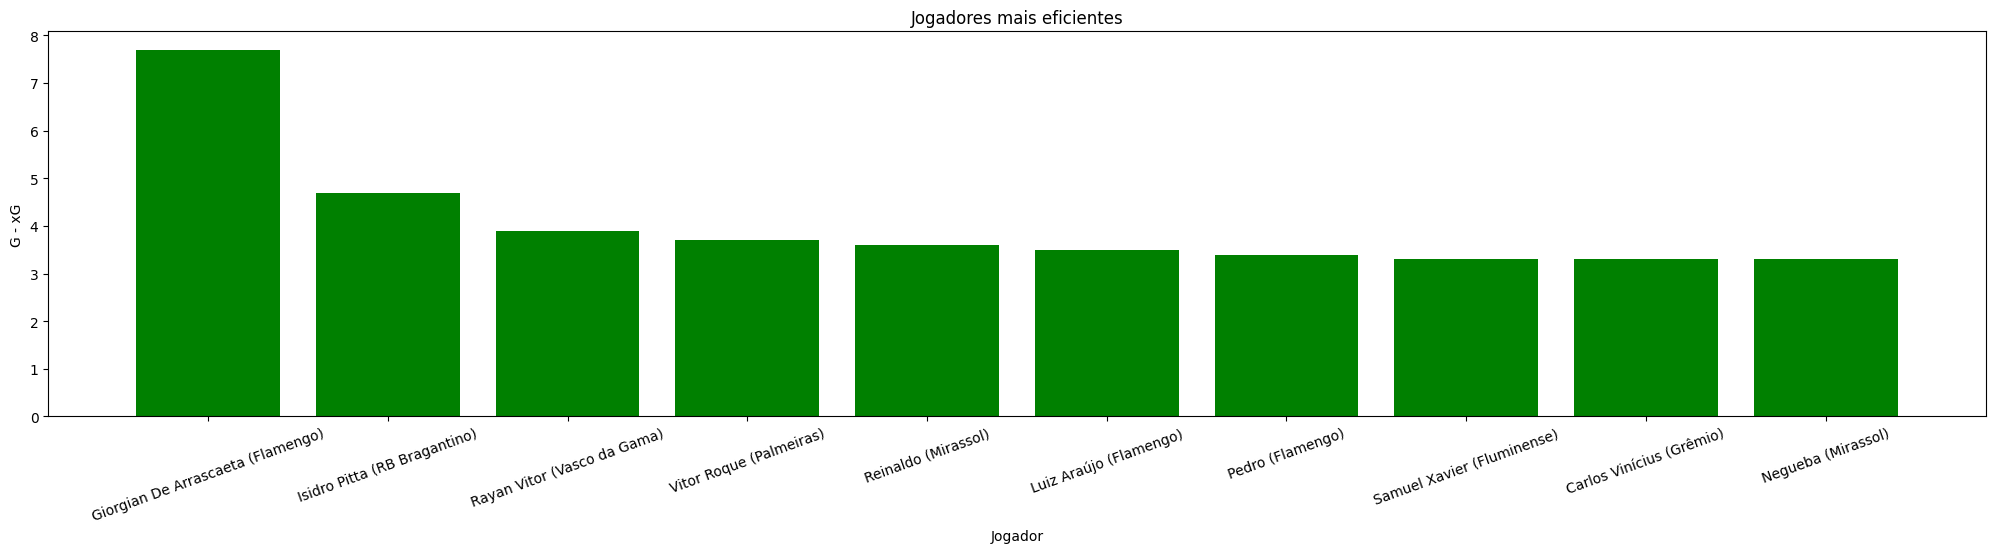

In [285]:
df_positivo['Player'] = np.where(
    df_positivo['Player'].str.contains(r"\("),
    df_positivo['Player'],
    df_positivo['Player'] + ' (' + df_positivo['Squad'] + ')'
)

plt.figure(figsize=(25, 5))

cores = df_positivo['G-xG'].apply(lambda x: 'green' if x > 0 else 'red')

plt.bar(df_positivo['Player'], df_positivo['G-xG'], color=cores)

plt.xticks(rotation=20)
plt.xlabel('Jogador')
plt.ylabel('G - xG')
plt.title('Jogadores mais eficientes')
plt.show()


In [286]:
df_chutes = df_chutes.sort_values(by='G-xG', ascending=True)
df_negativo = df_chutes.head(10)
df_negativo

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
406,392,Talles Magno,br BRA,"FW,MF",Corinthians,23-146,2002,9.7,1.0,25.0,...,12.9,0,0,0,4.1,4.1,0.16,-3.1,-3.1,Matches
655,631,Eduardo Sasha,br BRA,"FW,MF",RB Bragantino,33-268,1992,21.9,6.0,49.0,...,14.6,0,3,3,9.0,6.6,0.14,-3.0,-3.6,Matches
62,61,Lucas Barbosa,br BRA,"FW,MF",RB Bragantino,24-270,2001,22.5,3.0,46.0,...,17.1,0,0,0,5.7,5.7,0.12,-2.7,-2.7,Matches
621,599,Ángel Romero,py PAR,"FW,MF",Corinthians,33-138,1992,10.9,0.0,19.0,...,15.4,1,0,0,2.5,2.5,0.13,-2.5,-2.5,Matches
754,726,Wesley,br BRA,"FW,MF",Internacional,26-234,1999,13.7,0.0,28.0,...,18.9,0,0,0,2.3,2.3,0.08,-2.3,-2.3,Matches
650,626,Ademir Santos,br BRA,FW,Bahia,30-276,1995,17.4,1.0,34.0,...,17.7,1,0,0,3.3,3.3,0.10,-2.3,-2.3,Matches
92,90,Rafael Borré,co COL,FW,Internacional,30-065,1995,16.8,5.0,38.0,...,12.6,0,1,1,7.3,6.3,0.17,-2.3,-2.3,Matches
746,719,Wanderson,br BRA,"FW,MF",Cruzeiro,31-043,1994,19.9,0.0,33.0,...,20.9,0,0,0,2.2,2.2,0.07,-2.2,-2.2,Matches
355,343,Kaiki,br BRA,DF,Cruzeiro,22-256,2003,29.5,1.0,39.0,...,16.2,0,0,0,3.2,3.2,0.08,-2.2,-2.2,Matches
435,420,Juan Martín Lucero,ar ARG,FW,Fortaleza,33-354,1991,15.7,3.0,28.0,...,15.0,0,0,1,5.1,4.4,0.16,-2.1,-1.4,Matches


C:\Users\Pichau\AppData\Local\Temp\ipykernel_13264\2588340583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negativo['Player'] = np.where(


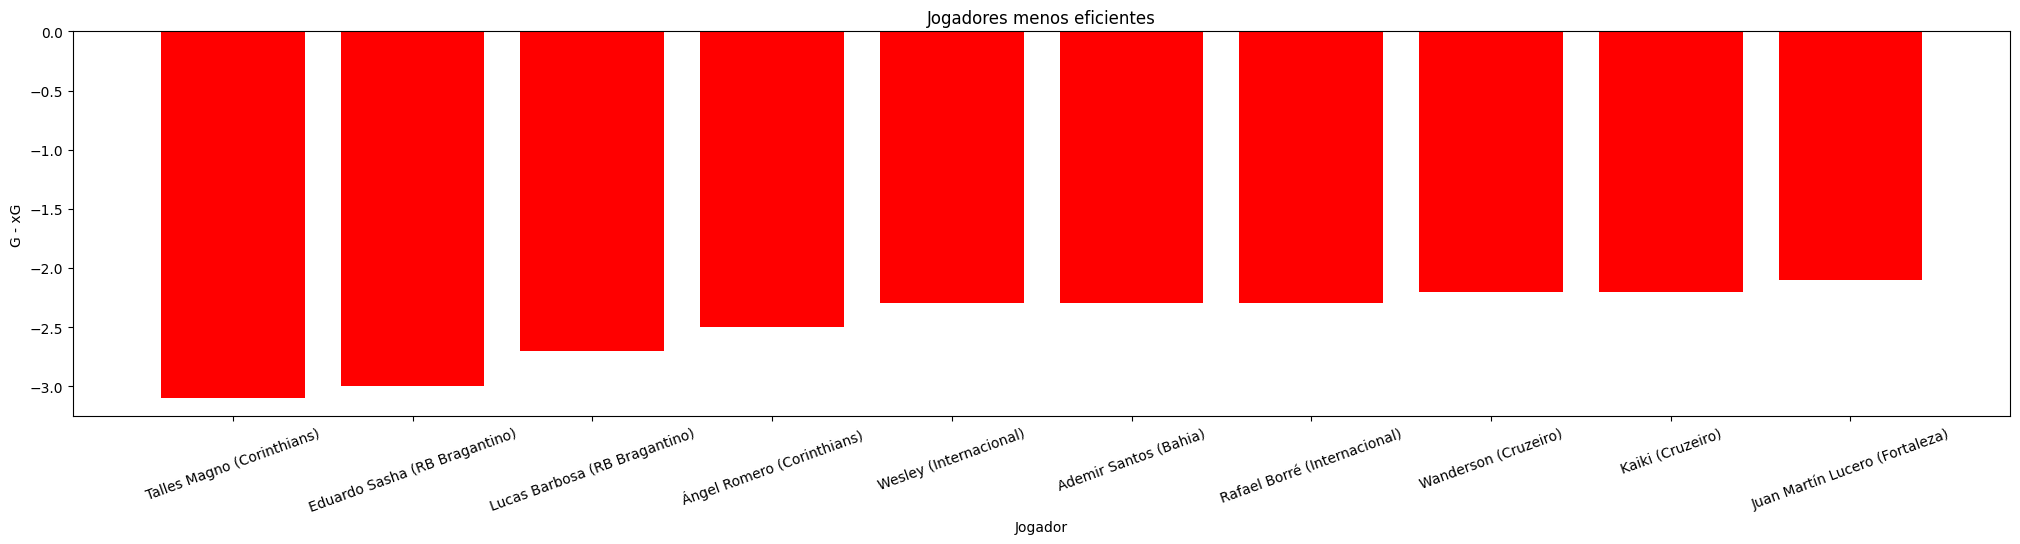

In [287]:
df_negativo['Player'] = np.where(
    df_negativo['Player'].str.contains(r"\("),
    df_negativo['Player'],
    df_negativo['Player'] + ' (' + df_negativo['Squad'] + ')'
)

plt.figure(figsize=(25, 5))

cores = df_negativo['G-xG'].apply(lambda x: 'green' if x > 0 else 'red')

plt.bar(df_negativo['Player'], df_negativo['G-xG'], color=cores)

plt.xticks(rotation=20)
plt.xlabel('Jogador')
plt.ylabel('G - xG')
plt.title('Jogadores menos eficientes')
plt.show()


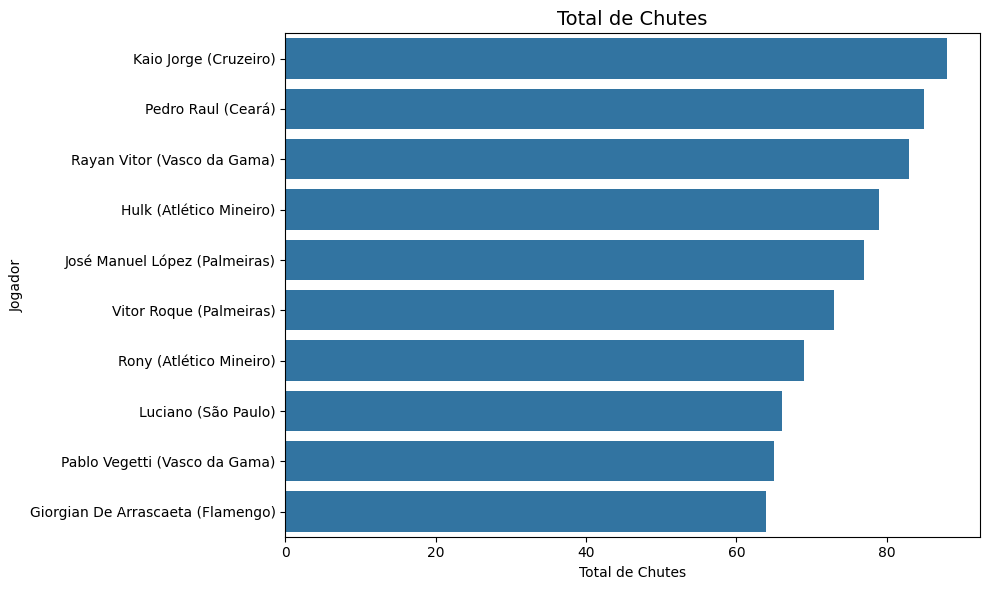

In [288]:
df_mais_chutes = df_chutes.sort_values(by='Sh', ascending=False)
df_mais_chutes = df_mais_chutes.head(10)

# Criar coluna com jogador + equipe
df_mais_chutes['Player'] = np.where(
    df_mais_chutes['Player'].str.contains(r"\("),
    df_mais_chutes['Player'],
    df_mais_chutes['Player'] + ' (' + df_mais_chutes['Squad'] + ')'
)
plt.figure(figsize=(10,6))

sns.barplot(
    x='Sh', 
    y='Player',  
    data=df_mais_chutes, 
)

plt.title('Total de Chutes', fontsize=14)
plt.xlabel('Total de Chutes')
plt.ylabel('Jogador')

plt.tight_layout()
plt.show()

In [289]:
# Jogadores com 900+ Minutos
df_shoot = df_chutes[(df_chutes['90s'] >= 10)].copy()

In [290]:
df_shoot['Gls/90'] = df_shoot['Gls']/df_shoot['90s']

In [291]:
df_shoot

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches,Gls/90
655,631,Eduardo Sasha,br BRA,"FW,MF",RB Bragantino,33-268,1992,21.9,6.0,49.0,...,0,3,3,9.0,6.6,0.14,-3.0,-3.6,Matches,0.273973
62,61,Lucas Barbosa,br BRA,"FW,MF",RB Bragantino,24-270,2001,22.5,3.0,46.0,...,0,0,0,5.7,5.7,0.12,-2.7,-2.7,Matches,0.133333
621,599,Ángel Romero,py PAR,"FW,MF",Corinthians,33-138,1992,10.9,0.0,19.0,...,1,0,0,2.5,2.5,0.13,-2.5,-2.5,Matches,0.000000
754,726,Wesley,br BRA,"FW,MF",Internacional,26-234,1999,13.7,0.0,28.0,...,0,0,0,2.3,2.3,0.08,-2.3,-2.3,Matches,0.000000
650,626,Ademir Santos,br BRA,FW,Bahia,30-276,1995,17.4,1.0,34.0,...,1,0,0,3.3,3.3,0.10,-2.3,-2.3,Matches,0.057471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,33,Luiz Araújo,br BRA,"FW,MF",Flamengo,29-170,1996,17.8,7.0,44.0,...,2,0,0,3.5,3.5,0.08,3.5,+3.5,Matches,0.393258
582,561,Reinaldo,br BRA,DF,Mirassol,36-052,1989,29.5,11.0,51.0,...,7,5,6,7.4,2.7,0.05,3.6,+3.3,Matches,0.372881
633,610,Vitor Roque,br BRA,FW,Palmeiras,20-264,2005,21.1,16.0,73.0,...,0,1,1,12.3,11.5,0.16,3.7,+3.5,Matches,0.758294
740,713,Rayan Vitor,br BRA,FW,Vasco da Gama,19-108,2006,27.6,12.0,83.0,...,2,2,2,8.1,6.6,0.08,3.9,+3.4,Matches,0.434783


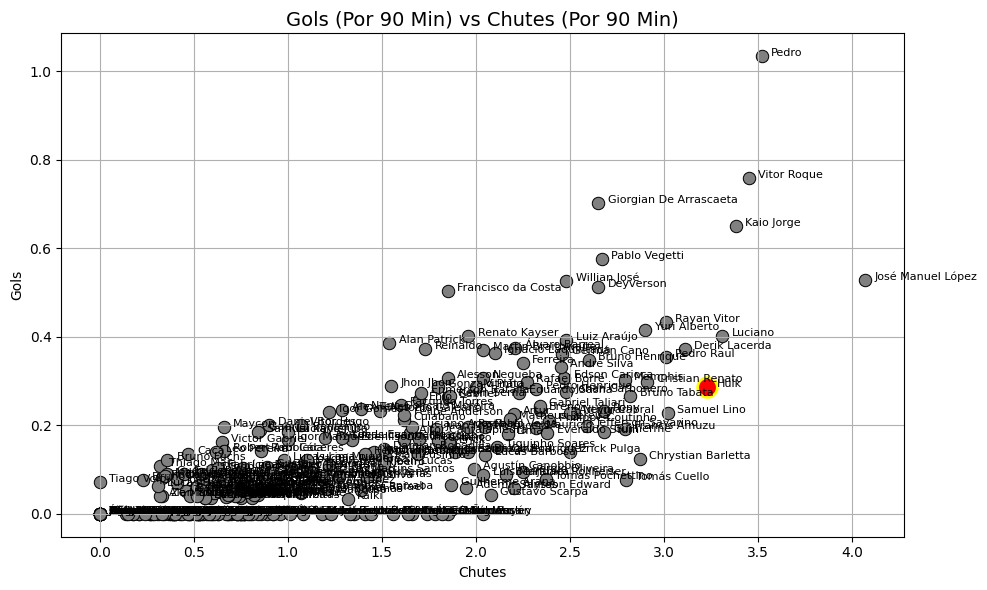

In [292]:
jogador_destaque = "Hulk"

plt.figure(figsize=(10,6))

# Plot dos demais jogadores
sns.scatterplot(
    x='Sh/90',
    y='Gls/90',
    data=df_shoot[df_shoot['Player'] != jogador_destaque],
    color='gray',  
    s=80,
    edgecolor='black'
)

# Plot do jogador destacado
sns.scatterplot(
    x='Sh/90',
    y='Gls/90',
    data=df_shoot[df_shoot['Player'] == jogador_destaque],
    color='red',  
    s=200,
    edgecolor='yellow',
    linewidth=2
)

for i in range(len(df_shoot)):
    plt.text(df_shoot['Sh/90'].iloc[i]+0.05, df_shoot['Gls/90'].iloc[i], df_shoot['Player'].iloc[i], fontsize=8)

plt.title('Gols (Por 90 Min) vs Chutes (Por 90 Min)', fontsize=14)
plt.xlabel('Chutes')
plt.ylabel('Gols')

plt.grid(True)
plt.tight_layout()
plt.show()
